<a href="https://colab.research.google.com/github/yagomsv/aulas_ciencia_de_dados_UFBA/blob/main/Aula_3_C_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 03 - Analisando os dados do Airbnb (Rio de Janeiro)


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2022-06-20/visualisations/listings.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,272,2022-04-23,1.87,1,311,8,NaN
1,556930647599893392,Venha passar uma pernoite em um veleiro na Urca!,198206849,Andréia,NaN,Urca,-22.94781,-43.16351,Private room,280,1,1,2022-02-19,0.25,1,365,1,NaN
2,1174007,100% Best View In Copa In Suite 2,3962758,Thiago Luiz,NaN,Copacabana,-22.97277,-43.17966,Private room,107,2,177,2022-06-07,1.69,6,357,29,NaN
3,8410797,Ipanema(Arpoador) 100mdo Mar/ Jan & Carnaval +Fev,42038091,Sheila,NaN,Ipanema,-22.98871,-43.19334,Private room,1000,3,1,2017-09-28,0.02,3,362,0,NaN
4,28053241,Navegar a Bordo de um Veleiro Francês no Rio!,193860988,Luciano,NaN,Urca,-22.95056,-43.17175,Private room,1850,2,0,NaN,NaN,1,180,0,NaN


In [4]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
24876,649994149549663983,Apartamento encantador no centro,184987752,Tatiane,NaN,Centro,-22.908390,-43.187100,Entire home/apt,251,1,0,NaN,NaN,1,358,0,NaN
24877,650006296362728202,Apartamento encantador em Copacabana,327150319,Elisabeth,NaN,Copacabana,-22.966930,-43.181400,Entire home/apt,440,1,1,2022-06-18,1.0,2,358,1,NaN
24878,650011310811912783,Apto em frente à praia com vista lateral mar,238604267,Claudia,NaN,Barra da Tijuca,-23.009351,-43.344853,Entire home/apt,380,1,0,NaN,NaN,12,90,0,NaN
24879,650020855611122186,Apto com vista deslumbrante na Barra,238604267,Claudia,NaN,Barra da Tijuca,-23.008220,-43.343700,Entire home/apt,300,2,0,NaN,NaN,12,89,0,NaN
24880,650025403378811576,Jumpinbed - Studio in Copacabana in front of t...,397106841,Jumpers,NaN,Copacabana,-22.976880,-43.189920,Entire home/apt,315,1,0,NaN,NaN,15,334,0,NaN


In [5]:
df.shape

(24881, 18)

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 24881
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [7]:
# Transformando a variável last_review para data
df["last_review"] = pd.to_datetime(df["last_review"])

In [8]:
# Verificando os valores nulos
df.isnull().sum()

id                                    0
name                                 21
host_id                               0
host_name                           117
neighbourhood_group               24881
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        7668
reviews_per_month                  7668
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           24881
dtype: int64

In [9]:
(df.isnull().sum()/ df.shape[0]).sort_values(ascending = False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.308187
last_review                       0.308187
host_name                         0.004702
name                              0.000844
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe76f8dac50>,
      dtype=object)

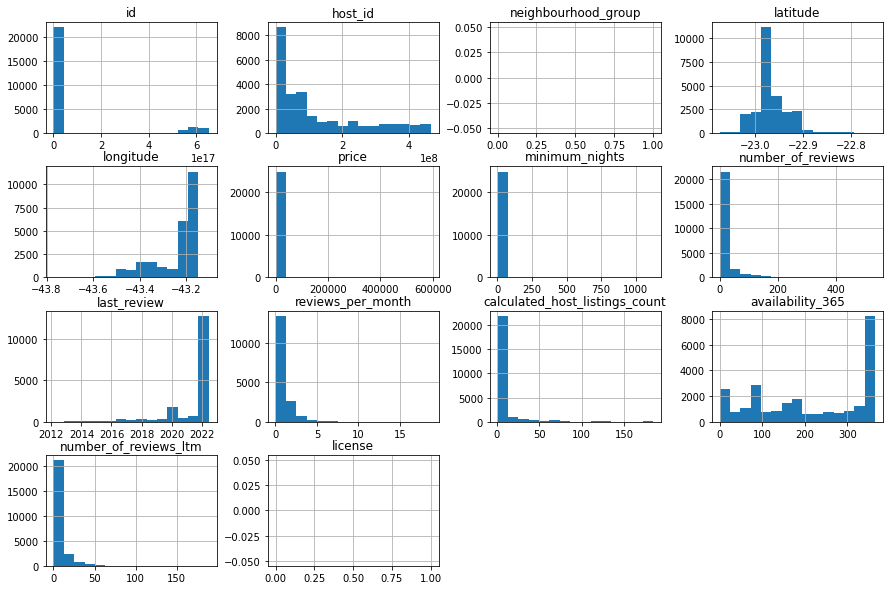

In [10]:
df.hist(bins= 15, figsize = (15,10))

In [11]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24881.000000,24881.000000,24881.000000,17213.000000,24881.000000,24881.000000
mean,745.395884,5.358426,16.818818,0.812952,8.020297,214.774165
std,4983.640074,26.044111,36.859241,1.011219,22.311380,131.693681
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,180.000000,1.000000,0.000000,0.130000,1.000000,89.000000
50%,300.000000,2.000000,3.000000,0.450000,1.000000,212.000000
75%,600.000000,4.000000,15.000000,1.100000,4.000000,356.000000
max,591723.000000,1125.000000,534.000000,18.740000,184.000000,365.000000


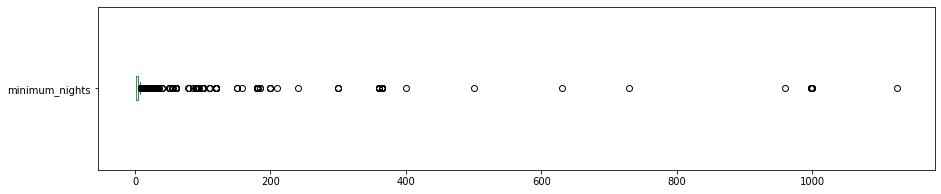

minimum_nights: valores acima de 30:
275 entradas
1.1053%


In [12]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

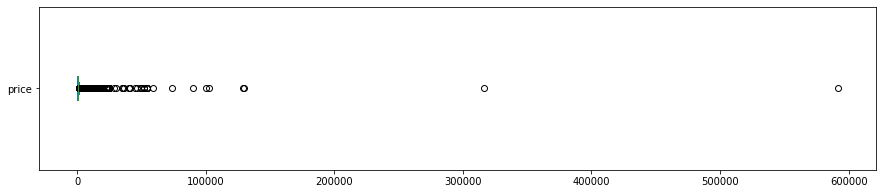

Preço: valores acima de R$ 1.500,00:
1830 entradas
7.3550%


In [13]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("Preço: valores acima de R$ 1.500,00:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

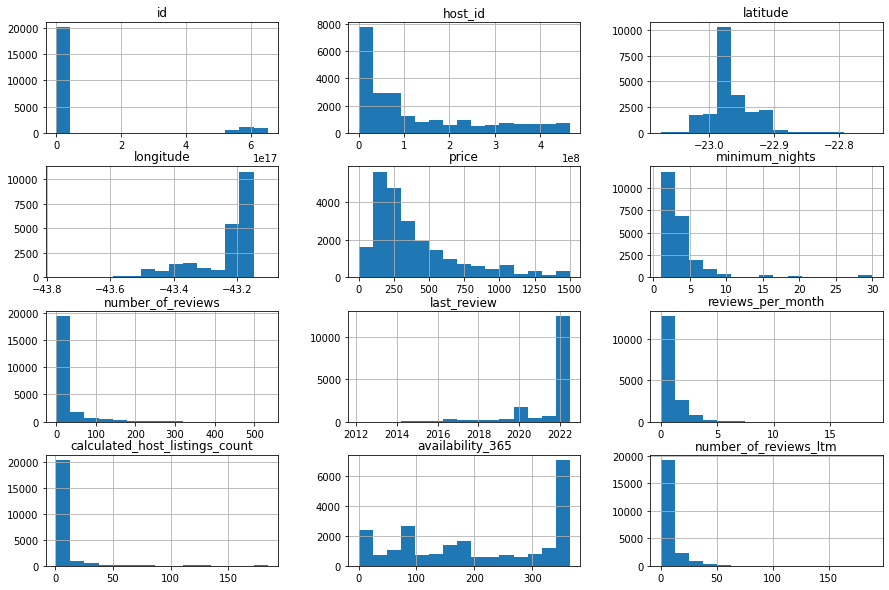

In [14]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True) # axis = 0 remove linhas
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True) # axis = 1 renove coluna
df_clean.drop('license', axis=1, inplace=True)



# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
    
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.106835,-0.167250,-0.179363,0.084582,0.134122
minimum_nights,0.106835,1.000000,-0.072592,-0.146840,-0.052652,-0.010835
number_of_reviews,-0.167250,-0.072592,1.000000,0.507833,-0.046796,-0.132774
reviews_per_month,-0.179363,-0.146840,0.507833,1.000000,0.009458,-0.097283
calculated_host_listings_count,0.084582,-0.052652,-0.046796,0.009458,1.000000,-0.004639
availability_365,0.134122,-0.010835,-0.132774,-0.097283,-0.004639,1.000000


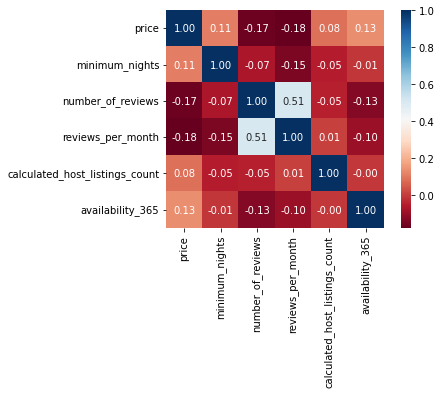

In [16]:
 sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

A variáveis number_of_reviews vs. reviews_per_month possui matematicamente a maior correlação entre as variáveis.

In [17]:
df_clean.room_type.value_counts()

Entire home/apt    17252
Private room        5061
Shared room          436
Hotel room            62
Name: room_type, dtype: int64

In [18]:
df_clean.room_type.value_counts()/ df_clean.shape[0]

Entire home/apt    0.756302
Private room       0.221867
Shared room        0.019114
Hotel room         0.002718
Name: room_type, dtype: float64

In [19]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:10]

neighbourhood
Anchieta              800.000000
Vaz Lobo              794.000000
Rocha Miranda         635.000000
Grumari               616.800000
Caju                  601.666667
São Conrado           575.261194
Joá                   574.400000
Santíssimo            563.666667
Complexo do Alemão    550.000000
Gericinó              545.500000
Name: price, dtype: float64

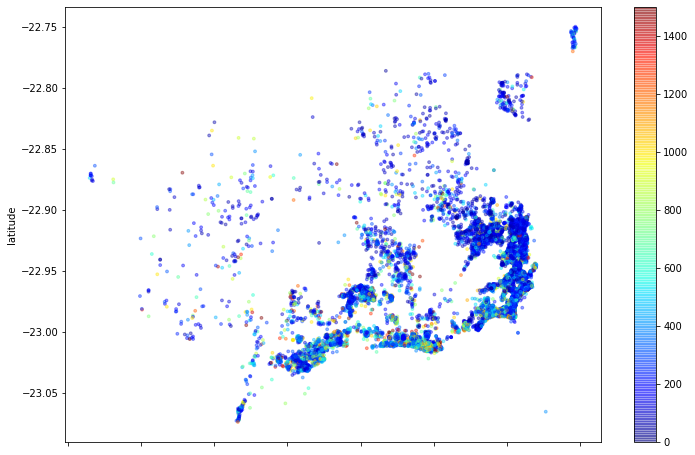

In [20]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [21]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [22]:
from pandas_profiling import ProfileReport

In [23]:
report = ProfileReport(df)

In [ ]:
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]